In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Cargar el archivo .csv
Data = pd.read_csv("datosmasas.xls")

# Listas
masas = Data["masas"].values         # Masas
x = Data["x"].values                 # Posiciones en X
y = Data["y"].values                 # Posiciones en Y
z = Data["z"].values                 # Posiciones en Z
r2 = Data[["x", "y"]].values         # Vector posición en el plano XY
r3 = Data[["x", "y", "z"]].values    # Vector posición en el espacio XYZ

# **Caso 1 (2D)**

## a. Momento de orden 0: Masa total (μ₀)}

Es simplemente la suma de las masas de todas las partículas:

$$ M = \sum_{i=1}^N m_i $$

donde $m_i$ es la masa de la partícula $i$. Este momento representa el “valor total” de la magnitud que se estudia, en este caso, la masa total del sistema.

In [6]:
Masa = 0  # Se define una masa inicial nula

for i in range(len(masas)):  # Se crea un bucle que itera en las masas
    Masa += masas[i]         # Se va sumando cada masa 
    
print(f"La masa total del sistema es {Masa} kg.")  # Se imprime el resultado

La masa total del sistema es 4627.0 kg.


## b. Momento de orden 1: Centro de masa (μ₁)}

El primer momento indica la posición media, ponderada por la masa:

$$
\vec{R}_{CM} = \frac{1}{\mu_0} \sum_{i=1}^{N} m_i \vec{r}_i
$$

donde $\vec{r}_i = (x_i, y_i)$ es la posición de la partícula $i$ en el espacio (x,y).

Este centro de masa es un vector que apunta al "centro" de la distribución de masa.

In [7]:
R_cm_2d = np.array([0.0, 0.0])  # Se define un centro de masa nulo

for i in range(len(masas)):      # Se crea un bucle que itera en las masas y el vector posición.
    R_cm_2d += masas[i] * r2[i]  # Se hace el calculo de cada masa por su respectiva posición en el plano xy. 

R_cm_2d /= Masa   # Se divide el resultado anterior por la masa total para obtener el centro de masa 2D "R_cm_2d"

print(f"El centro de masa del sistema es: R_cm = {R_cm_2d} m.") # Se imprime el resultado

El centro de masa del sistema es: R_cm = [825.81521504 776.91852172] m.


## c. Momento de orden 2: Tensor de inercia (μ₂)

En un sistema discreto de partículas, el segundo momento de masa define una *matriz simétrica* llamada *tensor de inercia*, que describe cómo está distribuida la masa respecto al centro de masa. Este objeto es fundamental en el estudio de la dinámica rotacional.

En 2D, el tensor de inercia centrado se expresa como:

$$
I = \sum_{i=1}^{N} 
\begin{pmatrix}
m_i(y_i - \bar{y})^2 & -m_i(x_i - \bar{x})(y_i - \bar{y}) \\
-m_i(x_i - \bar{x})(y_i - \bar{y}) & m_i(x_i - \bar{x})^2
\end{pmatrix}
$$

donde $ \vec{R}_{\text{CM}} = (\bar{x}, \bar{y}) $. Es decir, *las posiciones deben estar referidas al centro de masa*. Este tensor puede ser *diagonalizado*, y sus *autovalores* representan los *momentos principales de inercia*, con direcciones asociadas llamadas *ejes principales de inercia*.

In [8]:
I_2d = np.zeros((2, 2))   # Se define una matriz de inercia nula 

for i in range(len(masas)):   # Se crea un bucle que itera en las masas
    dx = x[i] - R_cm_2d[0]    # Se definen las coordendas x de cada punto respecto al centro de masa
    dy = y[i] - R_cm_2d[1]    # Se definen las coordendas y de cada punto respecto al centro de masa
    
    I_2d[0, 0] += masas[i] * dy**2     # I_11
    I_2d[1, 1] += masas[i] * dx**2     # I_22
    I_2d[0, 1] -= masas[i] * dx * dy   # I_12 = I_21

# Simetría
I_2d[1, 0] = I_2d[0, 1]      # I_12 = I_21

print(f"La matriz de inercia es")
print(I_2d)
print()

La matriz de inercia es
[[ 9.63660148e+08 -9.11747911e+08]
 [-9.11747911e+08  9.58535589e+08]]



Haciendo los respectivos cálculos mediante un bucle, obtenemos que el tensor de inercia es:

$$
I =
\begin{pmatrix}
\phantom{-}9.6366 \times 10^8 & -9.1174 \times 10^8 \\
-9.1174 \times 10^8 & \phantom{-}9.5853 \times 10^8
\end{pmatrix} =
\begin{pmatrix}
\phantom{-}9.6366 & -9.1174 \\
-9.1174 & \phantom{-}9.5853
\end{pmatrix} \times 10^8
$$

Esta matriz corresponde a una distribución de 1533 partículas en el plano $XY$, con una masa total de 4627 kg y un centro de masa ubicado en $(825.81,\ 776.91)$ m. Dado el tamaño y la masa del sistema, es normal que las componentes del tensor sean tan grandes.


### • ¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?

Esto es lo mismo a preguntar si la matriz del tensor de inercia en base cartesiana está diagonalizada, es decir, si la base canónica $\{\hat{\mathbf{x}}, \hat{\mathbf{y}}\}$ está alineada con los ejes principales de inercia.

Matemáticamente, eso sucede si y solo si el tensor $I$ es diagonal en la base cartesiana, es decir:

$$
I =
\begin{pmatrix}
I_{xx} & 0 \\
0 & I_{yy}
\end{pmatrix}
\quad \Rightarrow \quad
\text{los vectores cartesianos son autovectores.}
$$

Pero en nuestro caso, la matriz de inercia es:

$$
I =
\begin{pmatrix}
\phantom{-}9.6366 & -9.1174 \\
-9.1174 & \phantom{-}9.5853
\end{pmatrix} \times 10^8
$$

La cual, no es una matriz diagonal, ya que los componentes $I_{xy} = I_{yx} \neq 0$, así que:

**No, los vectores base del sistema cartesiano no constituyen una base propia para esta distribución de masa.**

### • Encuentre los ejes principales de inercia para esta distribución de masas. Estos son aquellos vectores propios del tensor de inercia, que forman una base ortogonal respecto a la cual la distribución de las masas se organiza de forma más simple.

In [9]:
eigenvalues_2d, eigenvectors_2d = np.linalg.eig(I_2d)  # Se calculan los autovalores y autovectores con la funcion "linalg.eig" de numpy

for i in range(len(eigenvalues_2d)):
    print(f"λ{i+1} = {eigenvalues_2d[i]}")
    print(f"V{i+1} = {eigenvectors_2d[:, i]}\n")

λ1 = 1872849380.3542147
V1 = [ 0.70809967 -0.7061125 ]

λ2 = 49346356.93733525
V2 = [0.7061125  0.70809967]



En nuestro caso:

$$
I =
\begin{pmatrix}
\phantom{-}9.6366 & -9.1174 \\
-9.1174 & \phantom{-}9.5853
\end{pmatrix} \times 10^8
$$

Para encontrar los autovalores del tensor de inercia, resolvemos la ecuación característica:

$$ 
\det(I - \lambda \mathbb{I}) = 0
$$

donde $ I $ es el tensor de inercia, $ \lambda $ el autovalor y $ \mathbb{I} $ la matriz identidad. Al resolver numéricamente en Python obtenemos:

$$ 
\lambda_1 = 4.9346 \times 10^7, \quad
\lambda_2 = 1.8728\times 10^9
$$

Para los autovectores, resolvemos:

$$
(I - \lambda_i \mathbb{I}) \vec{v}_i = 0
$$

y obtenemos:

$$
\vec{v}_1 = \begin{pmatrix} \phantom{-}0.7080 \\ -0.7061 \end{pmatrix}, \quad
\vec{v}_2 = \begin{pmatrix} \phantom{-}0.7061 \\ \phantom{-}0.7080\end{pmatrix}
$$

Estos vectores son ortonormales y definen los **ejes principales de inercia**.


### • Encuentre la matriz de transformación de la base cartesiana a la base de autovectores conformada por los ejes principales.

In [10]:
# autovectores: columnas = vectores propios (ejes principales)
P_2d = eigenvectors_2d  # Ya calculados previamente con np.linalg.eigh

print("Matriz de transformación de la base cartesiana a la base de autovectores:")
print(P_2d)

# Verificamos que efectivamente diagonaliza el tensor de inercia:
I_diag_2d = P_2d.T @ I_2d @ P_2d

# Aproximar los valores pequeños del orden de 10^-6 a cero
I_diag_2d[np.abs(I_diag_2d) < 1e-6] = 0

print("\nTensor de inercia en la base principal (forma diagonal):")
print(I_diag_2d)

Matriz de transformación de la base cartesiana a la base de autovectores:
[[ 0.70809967  0.7061125 ]
 [-0.7061125   0.70809967]]

Tensor de inercia en la base principal (forma diagonal):
[[1.87284938e+09 0.00000000e+00]
 [0.00000000e+00 4.93463569e+07]]


Dado que el tensor de inercia es una matriz simétrica, sus autovectores forman una base ortonormal. Esta base está compuesta por los **ejes principales de inercia**, es decir, las direcciones en las que la masa está distribuida de forma más "simétrica".

$$
P = 
\begin{pmatrix}
\phantom{-}0.7080 & \phantom{-}0.7061 \\
-0.7061 & \phantom{-}0.7080
\end{pmatrix}
$$

La **matriz de transformación** de la base cartesiana a la base principal de inercia es una matriz cuyas **columnas son los autovectores normalizados** del tensor de inercia. Denotemos esta matriz como \( P \). Como los autovectores forman una base ortonormal, se cumple que:

$$
P^{-1} = P^\top
$$

Usando esta matriz, podemos transformar el tensor de inercia \( I \) a su forma diagonal (sin productos de inercia) mediante:

$$
I_{\text{diag}} = P^\top I P
$$

Esto nos permite expresar el tensor en la **base de los ejes principales**, donde su forma es más simple.

$$
I = 
\begin{pmatrix}
4.9346 \times 10^7 & 0 \\
0 & 1.8728 \times 10^9
\end{pmatrix} = 
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix} 
$$

Donde $\lambda_1$ y $\lambda_2$ son los momentos principales de inercia del sistema respecto a sus ejes principales, que ya hallamos anteriormente. 

## Grafica de referencia para el caso en 2D.

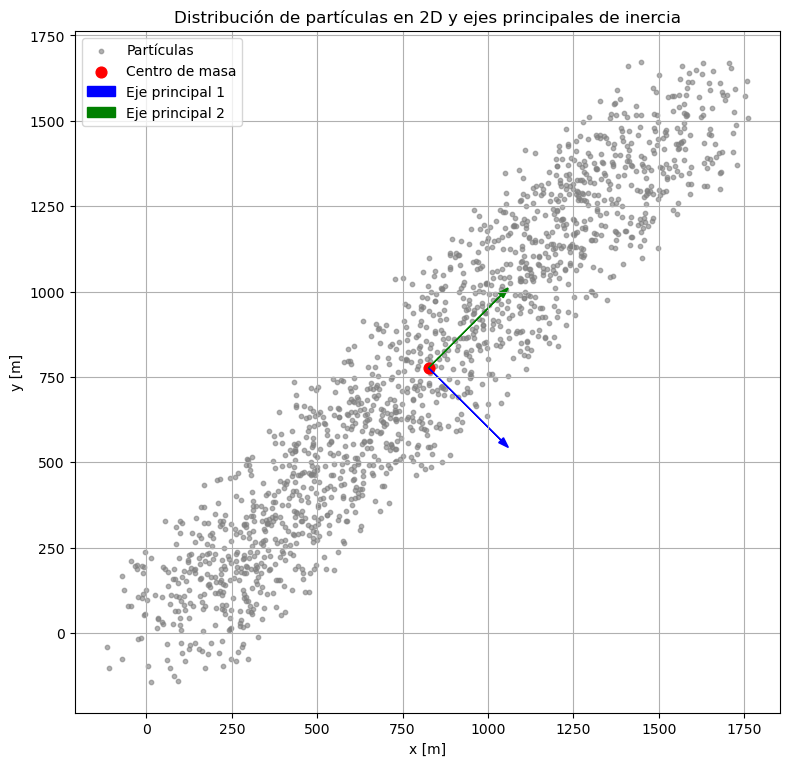

In [11]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# 1. Graficar partículas
ax.scatter(x, y, s=10, c='gray', alpha=0.6, label='Partículas')

# 2. Graficar centro de masa
ax.scatter(*R_cm_2d, color='red', s=60, label='Centro de masa')

# 3. Graficar ejes principales (autovectores escalados)
scale = 300  # Factor de escala visual
colors = ['blue', 'green']
for i in range(2):
    vec = eigenvectors_2d[:, i]  # Autovector
    ax.arrow(R_cm_2d[0], R_cm_2d[1], scale * vec[0], scale * vec[1],
             head_width=20, head_length=30, color=colors[i],
             label=f'Eje principal {i+1}')

# Etiquetas y estética
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title("Distribución de partículas en 2D y ejes principales de inercia")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


# **Caso 2 (3D)**

## a. Momento de orden 0: Masa total (μ₀)}

Es simplemente la suma de las masas de todas las partículas:

$$ M = \sum_{i=1}^N m_i $$

donde $m_i$ es la masa de la partícula $i$. Este momento representa el “valor total” de la magnitud que se estudia, en este caso, la masa total del sistema.

In [12]:
Masa = 0  # Se define una masa inicial nula

for i in range(len(masas)):  # Se crea un bucle que itera en las masas
    Masa += masas[i]         # Se va sumando cada masa 
    
print(f"La masa total del sistema es {Masa} kg.")  # Se imprime el resultado

La masa total del sistema es 4627.0 kg.


## b. Momento de orden 1: Centro de masa (μ₁)}

El primer momento indica la posición media, ponderada por la masa:

$$
\vec{R}_{CM} = \frac{1}{\mu_0} \sum_{i=1}^{N} m_i \vec{r}_i
$$

donde $\vec{r}_i = (x_i, y_i,z_i)$ es la posición de la partícula $i$ en el espacio (x,y,z).

Este centro de masa es un vector que apunta al "centro" de la distribución de masa.

In [13]:
R_cm_3d = np.array([0.0, 0.0, 0.0])  # Se define un centro de masa nulo

for i in range(len(masas)):      # Se crea un bucle que itera en las masas y el vector posición.
    R_cm_3d += masas[i] * r3[i]  # Se hace el calculo de cada masa por su respectiva posición en el espacio xyz. 

R_cm_3d /= Masa   # Se divide el resultado anterior por la masa total para obtener el centro de masa 3D "R_cm_3d"

print(f"El centro de masa del sistema es: R_cm = {R_cm_3d} m.") # Se imprime el resultado

El centro de masa del sistema es: R_cm = [825.81521504 776.91852172  15.5033499 ] m.


## c. Momento de orden 2: Tensor de inercia (μ₂)

En un sistema discreto de partículas, el segundo momento de masa define una *matriz simétrica* llamada *tensor de inercia*, que describe cómo está distribuida la masa respecto al centro de masa. Este objeto es fundamental en el estudio de la dinámica rotacional.

En 3D, el tensor de inercia centrado se expresa como:

$$
I = \begin{pmatrix}
\sum m_i \left[(y_i - \bar{y})^2 + (z_i - \bar{z})^2\right] 
& -\sum m_i (x_i - \bar{x})(y_i - \bar{y}) 
& -\sum m_i (x_i - \bar{x})(z_i - \bar{z}) \\
\\
-\sum m_i (x_i - \bar{x})(y_i - \bar{y}) 
& \sum m_i \left[(x_i - \bar{x})^2 + (z_i - \bar{z})^2\right] 
& -\sum m_i (y_i - \bar{y})(z_i - \bar{z}) \\
\\
-\sum m_i (x_i - \bar{x})(z_i - \bar{z}) 
& -\sum m_i (y_i - \bar{y})(z_i - \bar{z}) 
& \sum m_i \left[(x_i - \bar{x})^2 + (y_i - \bar{y})^2\right]
\end{pmatrix}
$$

donde $ \vec{R}_{\text{CM}} = (\bar{x}, \bar{y}) $. Es decir, *las posiciones deben estar referidas al centro de masa*. Este tensor puede ser *diagonalizado*, y sus *autovalores* representan los *momentos principales de inercia*, con direcciones asociadas llamadas *ejes principales de inercia*.

In [14]:
I_3d = np.zeros((3, 3))   # Se define una matriz 3x3 de inercia nula 

for i in range(len(masas)):   # Se crea un bucle que itera en las masas
    dx = x[i] - R_cm_3d[0]    # Se definen las coordendas x de cada punto respecto al centro de masa
    dy = y[i] - R_cm_3d[1]    # Se definen las coordendas y de cada punto respecto al centro de masa
    dz = z[i] - R_cm_3d[2]    # Se definen las coordendas z de cada punto respecto al centro de masa
    
    I_3d[0, 0] += masas[i] * ( dy**2 + dz**2 )  # I_11
    I_3d[1, 1] += masas[i] * ( dx**2 + dz**2 )  # I_22
    I_3d[2, 2] += masas[i] * ( dx**2 + dy**2 )  # I_33
    I_3d[0, 1] -= masas[i] * dx * dy            # I_12 = I_21
    I_3d[0, 2] -= masas[i] * dx * dz            # I_13 = I_31
    I_3d[1, 2] -= masas[i] * dy * dz            # I_23 = I_23

# Simetrías
I_3d[1, 0] = I_3d[0, 1]  # I_12 = I_21
I_3d[2, 0] = I_3d[0, 2]  # I_13 = I_31
I_3d[2, 1] = I_3d[1, 2]  # I_23 = I_23

print(f"La matriz de inercia es")
print(I_3d)

La matriz de inercia es
[[ 1.06550347e+09 -9.11747911e+08  7.14204864e+06]
 [-9.11747911e+08  1.06037891e+09  1.92959724e+06]
 [ 7.14204864e+06  1.92959724e+06  1.92219574e+09]]


Haciendo los respectivos cálculos mediante un bucle, obtenemos que el tensor de inercia es:

$$
I =
\begin{pmatrix}
 \phantom{-}1.0655 \times 10^9 & -9.1174 \times 10^8 & 7.1420 \times 10^6 \\
 -9.1174 \times 10^8 & \phantom{-}1.0603 \times 10^9 & 1.9295 \times 10^6 \\
 \phantom{-}7.1420\times 10^6 & \phantom{-}1.9295 \times 10^6 & 1.9221 \times 10^9
\end{pmatrix} 
$$

Esta matriz corresponde a una distribución de 1533 partículas en el espacio $XYZ$, con una masa total de 4627 kg y centro de masa en $(825.815,\ 776.919,\ 15.503)$ m. Dado el tamaño y la masa del sistema, es normal que las componentes del tensor sean tan grandes.

### • ¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?

Esto equivale a preguntar si la matriz del tensor de inercia en la base cartesiana está diagonalizada, es decir, si la base canónica $ \{\hat{\mathbf{x}}, \hat{\mathbf{y}}, \hat{\mathbf{z}}\} $ está alineada con los ejes principales de inercia.

Matemáticamente, eso sucede si y solo si el tensor $ I $ es diagonal en la base cartesiana, es decir:

$$
I =
\begin{pmatrix}
I_{xx} & 0 & 0 \\
0 & I_{yy} & 0 \\
0 & 0 & I_{zz}
\end{pmatrix}
\quad \Rightarrow \quad
\text{los vectores cartesianos son autovectores.}
$$

Pero en nuestro caso, la matriz de inercia es:

$$
I =
\begin{pmatrix}
 \phantom{-}1.0655 \times 10^9 & -9.1174 \times 10^8 & 7.1420 \times 10^6 \\
 -9.1174 \times 10^8 & \phantom{-}1.0603 \times 10^9 & 1.9295 \times 10^6 \\
 \phantom{-}7.1420\times 10^6 & \phantom{-}1.9295 \times 10^6 & 1.9221 \times 10^9
\end{pmatrix} 
$$

La cual no es una matriz diagonal, ya que sus componentes fuera de la diagonal no son cero. Por tanto:

**No, los vectores base del sistema cartesiano no constituyen una base propia para esta distribución de masa.**


### • Encuentre los ejes principales de inercia para esta distribución de masas. Estos son aquellos vectores propios del tensor de inercia, que forman una base ortogonal respecto a la cual la distribución de las masas se organiza de forma más simple.

In [15]:
eigenvalues_3d, eigenvectors_3d = np.linalg.eig(I_3d)   # Se calculan los autovalores y autovectores con la funcion "linalg.eig" de numpy

for i in range(len(eigenvalues_3d)):
    print(f"λ{i+1} = {eigenvalues_3d[i]}")
    print(f"V{i+1} = {eigenvectors_3d[:, i]}\n")

λ1 = 151166481.4879253
V1 = [-0.70611307 -0.70808985  0.00361904]

λ2 = 1974951575.7793753
V2 = [-0.70654139  0.7042117  -0.06989384]

λ3 = 1921960058.7119486
V3 = [-0.04694255  0.05190995  0.99754787]



En nuestro caso:

$$
I =
\begin{pmatrix}
 \phantom{-}1.0655 \times 10^9 & -9.1174 \times 10^8 & 7.1420 \times 10^6 \\
 -9.1174 \times 10^8 & \phantom{-}1.0603 \times 10^9 & 1.9295 \times 10^6 \\
 \phantom{-}7.1420\times 10^6 & \phantom{-}1.9295 \times 10^6 & 1.9221 \times 10^9
\end{pmatrix} 
$$

Para encontrar los autovalores del tensor de inercia, resolvemos la ecuación característica:

$$ 
\det(I - \lambda \mathbb{I}) = 0
$$

donde $ I $ es el tensor de inercia, $ \lambda $ el autovalor y $ \mathbb{I} $ la matriz identidad.  
Al resolver numéricamente en Python obtenemos:

$$ 
\lambda_1 = 1.5116 \times 10^8, \quad
\lambda_2 = 1.9749 \times 10^9, \quad
\lambda_3 = 1.9219 \times 10^9
$$

Para los autovectores, resolvemos:

$$
(I - \lambda_i \mathbb{I}) \vec{v}_i = 0
$$

y obtenemos:

$$
\vec{v}_1 =
\begin{pmatrix}
-0.7061 \\
-0.7080 \\
\phantom{-}0.0036
\end{pmatrix}, \quad
\vec{v}_2 =
\begin{pmatrix}
-0.7065 \\
\phantom{-}0.7042 \\
-0.0698
\end{pmatrix}, \quad
\vec{v}_3 =
\begin{pmatrix}
-0.0469 \\
\phantom{-}0.0519 \\
\phantom{-}0.9975
\end{pmatrix}
$$

Estos vectores son ortonormales y definen los **ejes principales de inercia** del sistema. Cada vector está asociado al respectivo momento principal \( \lambda_i \).


In [16]:
# autovectores: columnas = vectores propios (ejes principales)
P_3d = eigenvectors_3d  # Ya calculados previamente con np.linalg.eigh

print("Matriz de transformación de la base cartesiana a la base de autovectores:")
print(P_3d)

# Verificamos que efectivamente diagonaliza el tensor de inercia:
I_diag_3d = P_3d.T @ I_3d @ P_3d

# Aproximar los valores pequeños del orden de 10^-5 a cero
I_diag_3d[np.abs(I_diag_3d) < 1e-6] = 0

print("\nTensor de inercia en la base principal (forma diagonal):")
print(I_diag_3d)

Matriz de transformación de la base cartesiana a la base de autovectores:
[[-0.70611307 -0.70654139 -0.04694255]
 [-0.70808985  0.7042117   0.05190995]
 [ 0.00361904 -0.06989384  0.99754787]]

Tensor de inercia en la base principal (forma diagonal):
[[1.51166481e+08 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.97495158e+09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.92196006e+09]]


Dado que el tensor de inercia es una matriz simétrica, sus autovectores forman una base ortonormal. Esta base está compuesta por los **ejes principales de inercia**, es decir, las direcciones en las que la masa está distribuida de forma más "simétrica".

$$
P = 
\begin{pmatrix}
-0.7061 & -0.7065 & -0.0469 \\
-0.7080 & \phantom{-}0.7042   & \phantom{-}0.0519 \\
\phantom{-}0.0036 & -0.0698 &  \phantom{-}0.9975
\end{pmatrix}
$$

La **matriz de transformación** de la base cartesiana a la base principal de inercia es una matriz cuyas **columnas son los autovectores normalizados** del tensor de inercia. Denotemos esta matriz como \( P \). Como los autovectores forman una base ortonormal, se cumple que:

$$
P^{-1} = P^\top
$$

Usando esta matriz, podemos transformar el tensor de inercia \( I \) a su forma diagonal (sin productos de inercia) mediante:

$$
I_{\text{diag}} = P^\top I P
$$

Esto nos permite expresar el tensor en la **base de los ejes principales**, donde su forma es más simple.

$$
I = 
\begin{pmatrix}
1.5116 \times 10^8 & 0 & 0  \\
0 & 1.9749 \times 10^9 & 0  \\
0 & 0 & 1.9219 \times 10^9 
\end{pmatrix} = 
\begin{pmatrix}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
 0 & 0 & \lambda_3
\end{pmatrix} 
$$

Donde $\lambda_1$, $\lambda_2$ y $\lambda_3$ son los momentos principales de inercia del sistema respecto a sus ejes principales, que ya hallamos anteriormente. 

## Grafica de referencia para el caso en 3D.

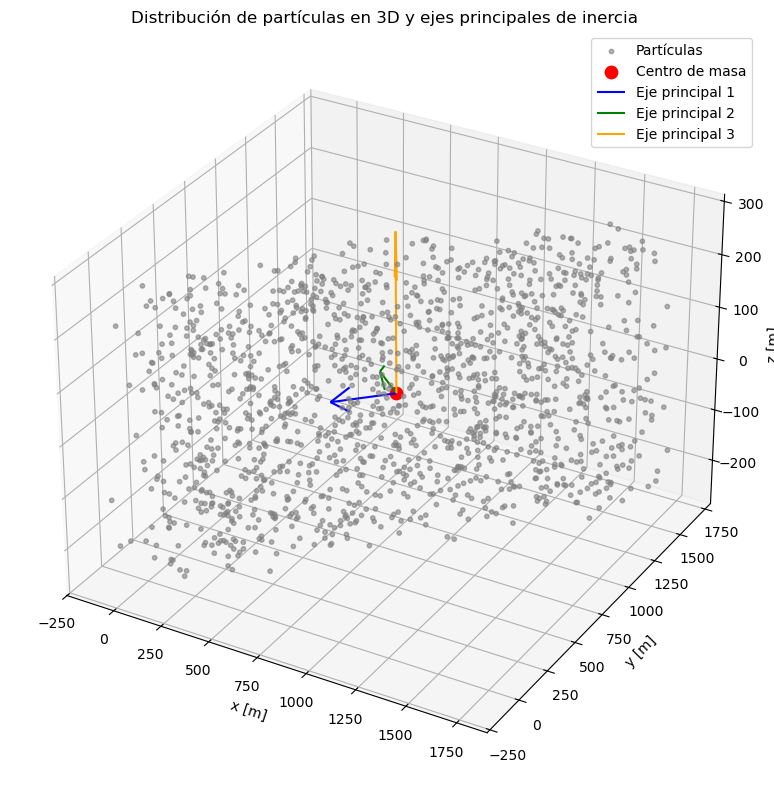

In [17]:
# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Graficar partículas
ax.scatter(x, y, z, s=10, c='gray', alpha=0.6, label='Partículas')

# 2. Graficar centro de masa
ax.scatter(*R_cm_3d, color='red', s=80, label='Centro de masa')

# 3. Graficar autovectores (ejes principales de inercia)
scale = 300  # Escalado visual
colors = ['blue', 'green', 'orange']

for i in range(3):
    vec = eigenvectors_3d[:, i]  # Autovector
    ax.quiver(R_cm_3d[0], R_cm_3d[1], R_cm_3d[2],
              vec[0], vec[1], vec[2],
              length=scale, normalize=True, color=colors[i],
              label=f'Eje principal {i+1}')

# Etiquetas y estética
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")
ax.set_title("Distribución de partículas en 3D y ejes principales de inercia")
ax.legend()
plt.tight_layout()
plt.show()